In [1]:
#Importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Reading Training set

hp_train = pd.read_csv('train.csv')

In [3]:
hp_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#Reading Testing set

hp_test = pd.read_csv('test.csv')

In [5]:
hp_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
hp_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

<Axes: >

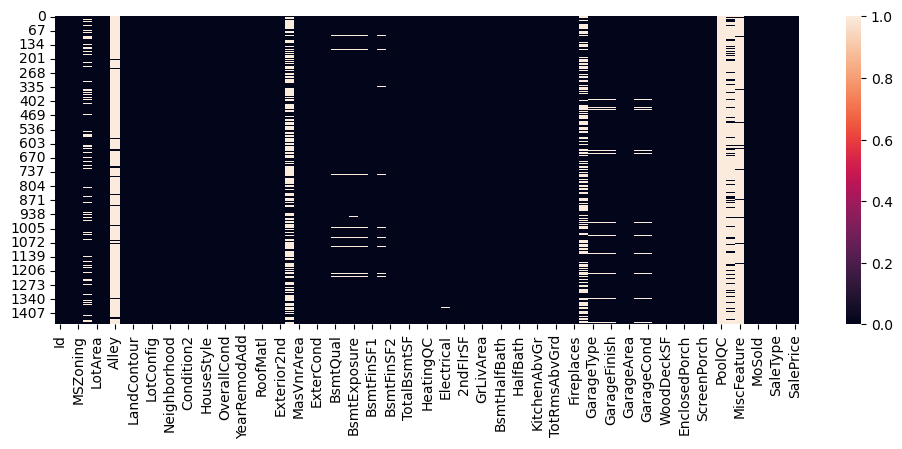

In [7]:
#Checking for null values using heatmap

plt.figure(figsize=(12,4))
sns.heatmap(data=hp_train.isnull())

In [8]:
# Splitting features necessary for predicting the sale price into 'features' and the target variable into 'target'.

square_feet_fields = [
    'LotArea',
    'TotalBsmtSF',
    '1stFlrSF',
    '2ndFlrSF',
    'GrLivArea',
    'GarageArea',
    'WoodDeckSF',
    'OpenPorchSF',
    'EnclosedPorch',
    '3SsnPorch',
    'ScreenPorch'
]

bedroom_fields = [
    'BedroomAbvGr'
]

bathroom_fields = [
    'BsmtFullBath',
    'BsmtHalfBath',
    'FullBath',
    'HalfBath'
]

features = square_feet_fields + bedroom_fields + bathroom_fields

In [9]:
X = hp_train[features]
y = hp_train['SalePrice']

<Axes: >

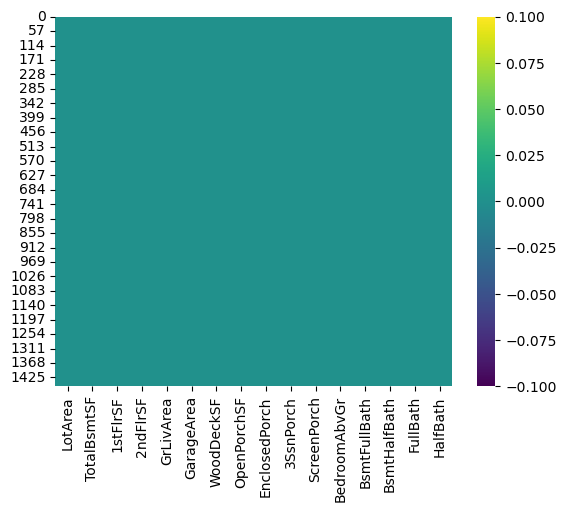

In [10]:
#Checking for null values in the feature set X

sns.heatmap(data=X.isnull(),cmap='viridis')

In [11]:
#Splitting training and testing set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [12]:
#Importing Linear regression model

from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [13]:
#Fit the model with training set

model.fit(X_train,y_train)

LinearRegression()

In [14]:
#Predicting for the splitted test set

prediction = model.predict(X_test)

In [15]:
prediction

array([249242.24873789, 144525.69980318, 146141.26572026, 338926.71611515,
       318104.61961751, 114173.20777363, 160017.01167468, 152817.95258227,
       163287.67950118, 146805.60933343, 116820.08823063, 179109.18478157,
       159338.43206663, 160525.44041021, 165323.66160313, 168896.24303468,
       172859.46275958,  93229.99610338, 146850.89007581, 244007.3524993 ,
       137838.50975383,  73798.34054832, 232329.62584791, 140411.84065066,
       217306.13158674, 147152.1922163 , 117832.42344769, 209371.72905265,
       184774.78884701, 138769.46996486, 209970.53978901, 184876.833088  ,
       164654.37247934, 239989.99517389,  11945.35370933,  75141.25387618,
       353509.98297086, 225639.70683983, 125332.85091542,  21869.01163048,
       252762.50660842, 204983.635137  , 222970.61459941, 173196.68665554,
       225223.12065722, 163629.05351234, 282982.55936289, 204379.37376597,
       137900.51305294, 196526.22807177, 220693.72581851, 308240.11917143,
       102238.16400534, 1

In [16]:
hp_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [17]:
#Now splitting necessary features in the actual test set that we need to predict the sale price

test = hp_test[features]

In [18]:
test.head()

,LotArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,BedroomAbvGr,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath
0,11622,882.0,896,0,896,730.0,140,0,0,0,120,2,0.0,0.0,1,0
1,14267,1329.0,1329,0,1329,312.0,393,36,0,0,0,3,0.0,0.0,1,1
2,13830,928.0,928,701,1629,482.0,212,34,0,0,0,3,0.0,0.0,2,1
3,9978,926.0,926,678,1604,470.0,360,36,0,0,0,3,0.0,0.0,2,1
4,5005,1280.0,1280,0,1280,506.0,0,82,0,0,144,2,0.0,0.0,2,0


<Axes: >

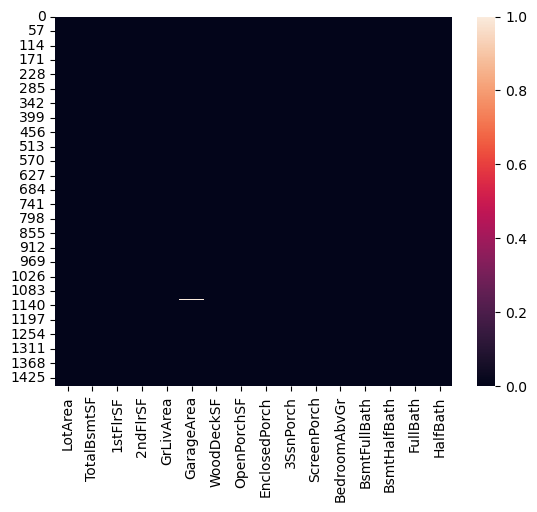

In [19]:
#Checking for null values

sns.heatmap(test.isnull())

In [20]:
#Data cleaning by filling null values with 0

test = test.fillna(0)

In [21]:
#Checking for null values after data cleaning process

test.isnull().sum()

LotArea          0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
BedroomAbvGr     0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
dtype: int64

In [22]:
#Final predicting of the test set

final = model.predict(test)

In [23]:
final

array([146313.21312286, 169137.16293099, 196592.26518469, ...,
       165505.14618216,  77948.84096225, 239673.82049727])

In [24]:
#Evaluating the model performance by calculating the residual sum of squares and the explained variance score (R^2)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [25]:
mse = mean_squared_error(y_test, prediction)
mae = mean_absolute_error(y_test, prediction)
r2 = r2_score(y_test, prediction)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 2654841208.1125655
Mean Absolute Error (MAE): 27779.56092732697
R-squared (R²): 0.5781166723422171


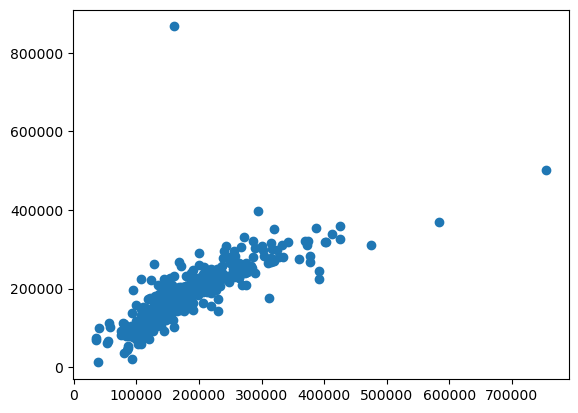

In [26]:
#Scatterplot of the real test values versus the predicted values

plt.scatter(y_test,prediction)

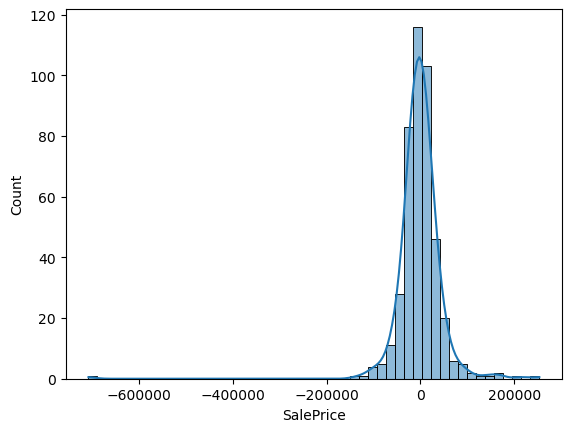

In [28]:
#Plotting a histogram of the residuals and make sure it looks normally distributed

sns.histplot((y_test - prediction), bins=50, kde=True)

plt.show()

In [29]:
#Creating dataframe for the final predictions

final_output = pd.DataFrame(data=final,columns=['SalePrice'])

In [30]:
final_output

,SalePrice
0,146313.213123
1,169137.162931
2,196592.265185
3,197339.742499
4,191538.318760
...,...
1454,77371.848328
1455,99666.700228
1456,165505.146182
1457,77948.840962
